In [ ]:
def clean_code(file_path):
    cleaned_code = []
    with open(file_path, 'r') as file:
        for line in file:
            stripped_line = line.strip()
            if stripped_line and not stripped_line.startswith("#"):
                cleaned_code.append(stripped_line)
    return '\n'.join(cleaned_code)

file_path = 'Python_code_data.txt' 
cleaned_code = clean_code(file_path)
with open('cleaned_code.txt', 'w') as f:
    f.write(cleaned_code)
print("Cleaned code saved to 'cleaned_code.txt'")

In [4]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt') 

def nltk_tokenize_code(code):
    return word_tokenize(code)

with open('cleaned_code.txt', 'r') as f:
    cleaned_code = f.read()
tokens = nltk_tokenize_code(cleaned_code)
print("First 20 tokens:", tokens[:20])
print("Total tokens:", len(tokens))

[nltk_data] Downloading package punkt to /home/aniruddh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First 20 tokens: ['num1', '=', '1.5', 'num2', '=', '6.3', 'sum', '=', 'num1', '+', 'num2', 'print', '(', "f'Sum", ':', '{', 'sum', '}', "'", ')']
Total tokens: 209425


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
import pickle

def create_sequences(tokens, seq_length=10):
    inputs, outputs = [], []
    for i in range(len(tokens) - seq_length):
        inputs.append(tokens[i:i+seq_length])
        outputs.append(tokens[i+seq_length])
    return inputs, outputs

seq_length = 10
inputs, outputs = create_sequences(tokens, seq_length)

vocab = sorted(set(tokens))
print(f"Vocabulary size: {len(vocab)}")

token_to_idx = {token: idx for idx, token in enumerate(vocab)}
    
idx_to_token = {idx: token for token, idx in token_to_idx.items()}

inputs = [[token_to_idx[token] for token in sequence] for sequence in inputs]
outputs = [token_to_idx[token] for token in outputs]

print(f"First input sequence: {inputs[0]}")
print(f"First output token index: {outputs[0]}")

X_train, X_val, y_train, y_val = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")


Vocabulary size: 8238
First input sequence: [5901, 1574, 1069, 5905, 1574, 1453, 7407, 1574, 5901, 727]
First output token index: 5905
Training samples: 167532, Validation samples: 41883


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

vocab_size = len(vocab)
embedding_dim = 64
lstm_units = 128

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64),
    LSTM(64),
    Dense(vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)
model.summary()

2024-11-30 04:48:41.292092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732922321.307917   86686 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732922321.312824   86686 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-30 04:48:41.329634: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1732922322.838348   86686 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 75

Epoch 1/10


I0000 00:00:1732922324.673764   91918 cuda_dnn.cc:529] Loaded cuDNN version 90300


2618/2618 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.1302 - loss: 5.3069 - val_accuracy: 0.3133 - val_loss: 4.0703
Epoch 2/10
2618/2618 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.3477 - loss: 3.7854 - val_accuracy: 0.4049 - val_loss: 3.5033
Epoch 3/10
2618/2618 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.4317 - loss: 3.1759 - val_accuracy: 0.4464 - val_loss: 3.2308
Epoch 4/10
2618/2618 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.4760 - loss: 2.8265 - val_accuracy: 0.4678 - val_loss: 3.0689
Epoch 5/10
2618/2618 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5053 - loss: 2.5775 - val_accuracy: 0.4922 - val_loss: 2.9510
Epoch 6/10
2618/2618 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5337 - loss: 2.3762 - val_accuracy: 0.5037 - val_loss: 2.8765
Epoch 7/10
2618/2618 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5607 - loss: 2.1823 - val_accuracy: 0.5191 - val_loss: 2.8074
Epoch 8/10
2618/2618 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5836 - loss: 2.0369 - val

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 10, 64)         │       527,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8238)           │       535,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,287,180 (12.54 MB)

 Trainable params: 1,095,726 (4.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,191,454 (8.36 MB)

In [7]:
import pickle
with open("vocab_small", "wb") as file:
    pickle.dump(token_to_idx, file)
    
import pickle
with open("t_to_i.pkl", "wb") as file:
    pickle.dump(token_to_idx, file)
    
with open("i_to_t.pkl", "wb") as file:
    pickle.dump(idx_to_token, file)

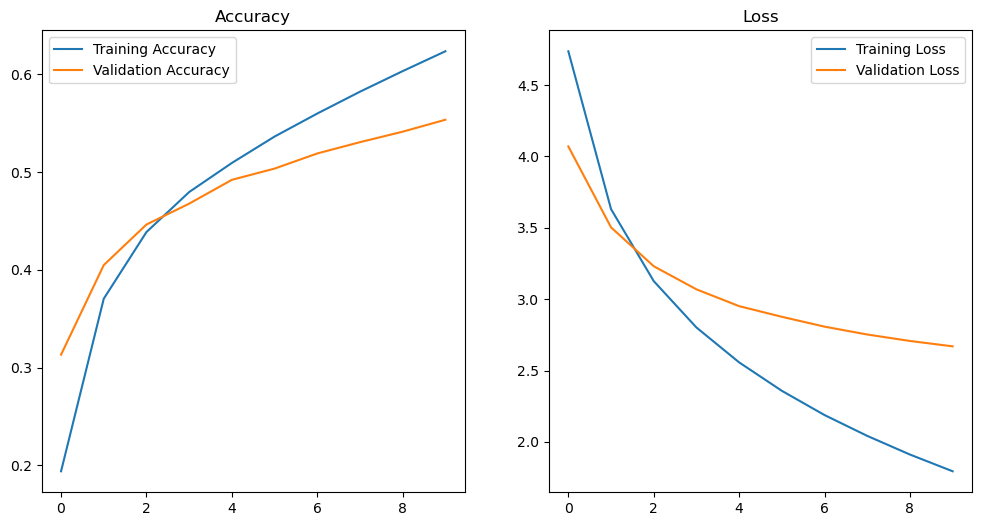

In [8]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)


In [9]:
def predict_next_token(input_seq, model, token_to_idx, idx_to_token):
    input_indices = [token_to_idx[token] for token in input_seq]
    input_indices = np.array(input_indices).reshape(1, -1)

    prediction = model.predict(input_indices, verbose=0)
    next_token_idx = np.argmax(prediction)
    return idx_to_token[next_token_idx]

input_seq = tokens[:seq_length]  
next_token = predict_next_token(input_seq, model, token_to_idx, idx_to_token)
print(f"Input: {' '.join(input_seq)}")
print(f"Predicted next token: {next_token}")

Input: num1 = 1.5 num2 = 6.3 sum = num1 +
Predicted next token: num2


In [10]:
import re

def tokenize_input(code, vocab):
    tokens = re.findall(r'\b\w+\b|[^\s\w]', code)
    return [token for token in tokens if token in vocab]

input = "def sum(a,b" 
input_seq = tokenize_input(input, vocab)
next_token = predict_next_token(input_seq, model, token_to_idx, idx_to_token)
print(f"Input: {' '.join(input_seq)}")
print(f"Predicted next token: {next_token}")

Input: def sum ( a , b
Predicted next token: ,


In [11]:
input = """
lst = [1,2]
lst.append
""" 
input_seq = tokenize_input(input, vocab)
next_token = predict_next_token(input_seq, model, token_to_idx, idx_to_token)
print(f"Input: {' '.join(input_seq)}")
print(f"Predicted next token: {next_token}")

Input: lst = [ 1 , 2 ] lst . append
Predicted next token: (


In [12]:
input = """
for i in range():
    sum = num1 +
""" 
input_seq = tokenize_input(input, vocab)
next_token = predict_next_token(input_seq, model, token_to_idx, idx_to_token)
print(f"Input: {' '.join(input_seq)}")
print(f"Predicted next token: {next_token}")

Input: for i in range ( ) : sum = num1 +
Predicted next token: str


In [13]:
model.save('LSTM_small_10e.h5')